<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/334_training_YOLO_V8_EM_platelets_converted_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the required libraries:**

installing ultralytics library matplotlib, Pillow, numpy, Seaborn, and roboflow,
 pandas

In [ ]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

**Import a model and populate it with pre-trained weights.**


In [ ]:

model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.73M/6.73M [00:00<00:00, 136MB/s]


**Install Roboflow**


In [ ]:

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install roboflow --quiet
%cd /content/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.9 MB/s eta 0:00:00
/content


Let us load the YAML file that contains the names of our classes, number of classes and the directories for train, valid, and test datasets, respectively.

In [ ]:
%cd /content/Dental-1

[Errno 2] No such file or directory: '/content/Dental-1'
/content


In [ ]:
%cat /content/Dental-1/data.yaml

cat: /content/Dental-1/data.yaml: No such file or directory


In [ ]:
# define number of classes based on YAML
import yaml
with open("/content/Dental-1/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

**Train the model**

In [ ]:
#Define a project --> Destination directory for all results
project = "/content/results"
#Define subdirectory for this specific training
name = "20_epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

In [ ]:
# Train the model
results = model.train(data='/content/Dental-1/data.yaml',
                      project=project,
                      name=name,
                      epochs=20,
                      patience=0,
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Dental-1/data.yaml, epochs=20, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/results, name=20_epochs-4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 23.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 97.5MB/s]


AMP: checks passed ✅


train: Scanning /content/Dental-1/train/labels... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 739.70it/s]

train: New cache created: /content/Dental-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Dental-1/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 349.46it/s]

val: New cache created: /content/Dental-1/valid/labels.cache


Plotting labels to /content/results/20_epochs-4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/results/20_epochs-4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.25G      3.626      5.958      4.188      3.071         37        800: 100%|██████████| 14/14 [00:14<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         10        269   0.000331    0.00287   0.000176   1.76e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.08G      2.903      4.971       4.01       2.43         47        800: 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         10        269   0.000331    0.00287   0.000176   1.76e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.18G      2.056      3.934       3.47      1.719        111        800: 100%|██████████| 14/14 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


                   all         10        269     0.0213      0.217     0.0582     0.0186     0.0115      0.117     0.0226    0.00366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.82G      1.905       3.65      2.998       1.59        116        800: 100%|██████████| 14/14 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         10        269     0.0533      0.551      0.122     0.0358      0.029      0.291     0.0354      0.008



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.89G      1.845      3.545      2.655      1.555        112        800: 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         10        269     0.0644      0.706      0.202     0.0639      0.055      0.597      0.151     0.0402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.31G      1.873      3.476      2.453      1.551        100        800: 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         10        269      0.509      0.164      0.241     0.0865      0.465      0.155      0.189     0.0544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.71G      1.935      3.397      2.377      1.555         61        800: 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         10        269      0.494      0.231      0.258     0.0982      0.512      0.242       0.25     0.0758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.55G      1.902      3.424      2.302      1.584         39        800: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         10        269      0.307       0.49      0.369      0.158      0.309      0.409      0.315     0.0978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.15G      1.953      3.443      2.435      1.631        136        800: 100%|██████████| 14/14 [00:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         10        269      0.366      0.484      0.407      0.187      0.324       0.41      0.327      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.39G       1.83      3.273      2.121      1.517        141        800: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         10        269      0.351      0.512        0.4      0.179      0.344      0.362      0.336      0.113


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.07G      1.843      3.473       1.99      1.623         55        800: 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         10        269      0.389      0.498      0.411      0.169      0.366      0.343      0.323      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.36G      1.761      3.336      1.945      1.593         54        800: 100%|██████████| 14/14 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         10        269      0.367       0.69      0.497       0.22      0.341      0.579      0.425      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.28G       1.74      3.212      1.898      1.589         59        800: 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         10        269      0.417      0.602      0.482      0.251      0.441      0.527      0.446      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.44G      1.735      3.196      1.848       1.58         62        800: 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         10        269      0.417      0.602      0.482      0.251      0.441      0.527      0.446      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.03G      1.753      3.216      1.802      1.594         55        800: 100%|██████████| 14/14 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         10        269      0.657      0.469       0.49      0.262      0.644      0.452      0.464      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.13G      1.677      3.176       1.77      1.545         53        800: 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         10        269      0.372      0.642      0.507      0.282      0.365       0.62      0.482      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.41G      1.678      3.173      1.742      1.566         48        800: 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         10        269      0.385       0.63        0.5      0.286      0.363      0.596      0.467      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.04G      1.648      3.034        1.7      1.543         49        800: 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         10        269      0.411      0.641      0.496      0.269      0.362      0.594      0.449        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.33G      1.621      3.017       1.68      1.515         59        800: 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         10        269      0.453      0.598      0.513       0.28      0.399      0.611      0.472       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.39G      1.604       3.03      1.658      1.514         61        800: 100%|██████████| 14/14 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         10        269      0.446      0.591      0.539      0.299       0.41      0.642      0.512      0.229



20 epochs completed in 0.038 hours.
Optimizer stripped from /content/results/20_epochs-4/weights/last.pt, 6.8MB
Optimizer stripped from /content/results/20_epochs-4/weights/best.pt, 6.8MB

Validating /content/results/20_epochs-4/weights/best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]


                   all         10        269      0.447      0.591       0.54      0.299      0.408      0.638      0.511      0.228
                Canine         10         39      0.245      0.128      0.217      0.107       0.27      0.231       0.19     0.0697
              Incisors         10         80      0.547      0.812      0.627      0.316      0.475      0.793      0.579      0.253
                 Molar         10         87      0.662       0.92      0.922      0.583      0.608      0.926      0.913      0.486
              Premolar         10         63      0.332      0.505      0.394      0.189      0.278      0.603      0.362      0.102
Speed: 0.4ms preprocess, 13.6ms inference, 0.0ms loss, 9.5ms postprocess per image
Results saved to /content/results/20_epochs-4


All training curves, metrics, and other results are stored as images in the 'runs' directory.

In [ ]:
from IPython.display import Image

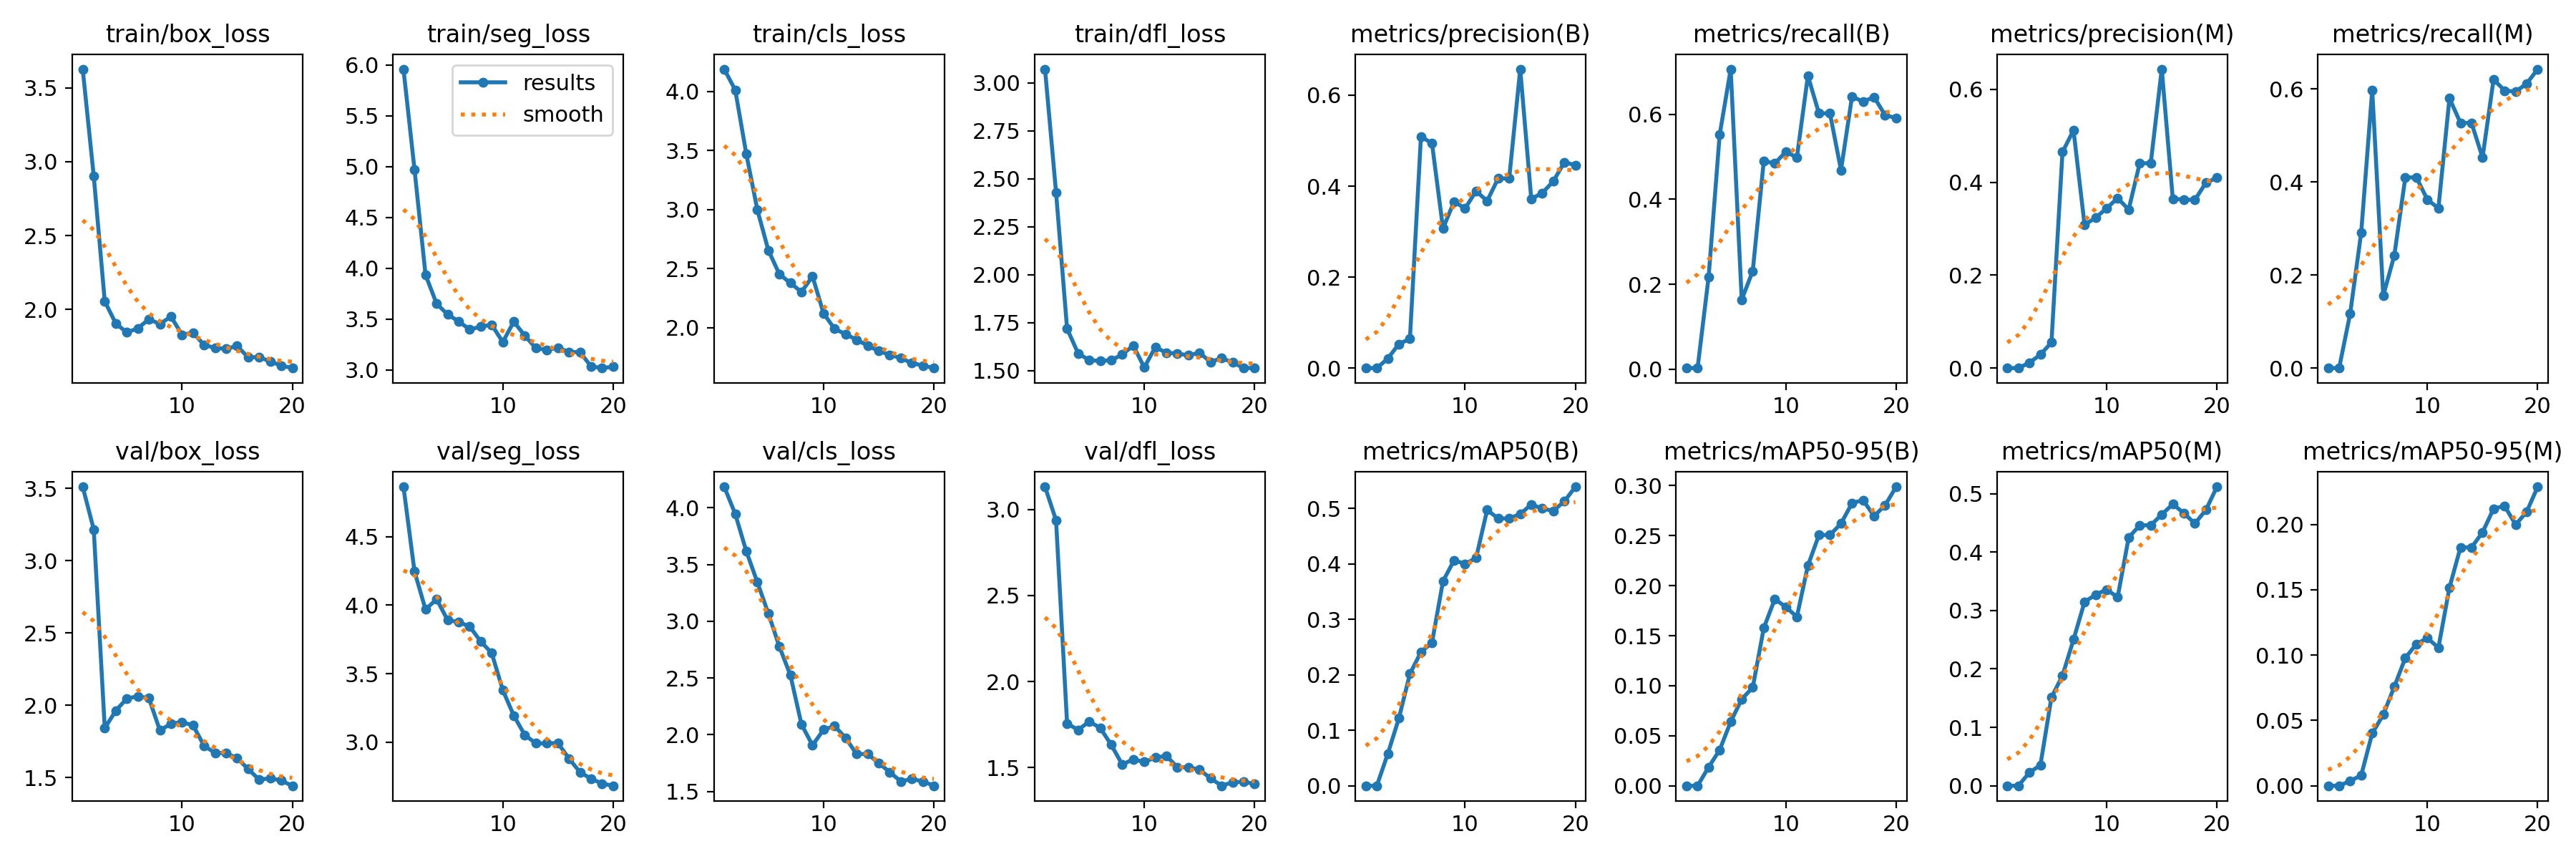

In [ ]:
Image("/content/results/20_epochs-4/results.png")

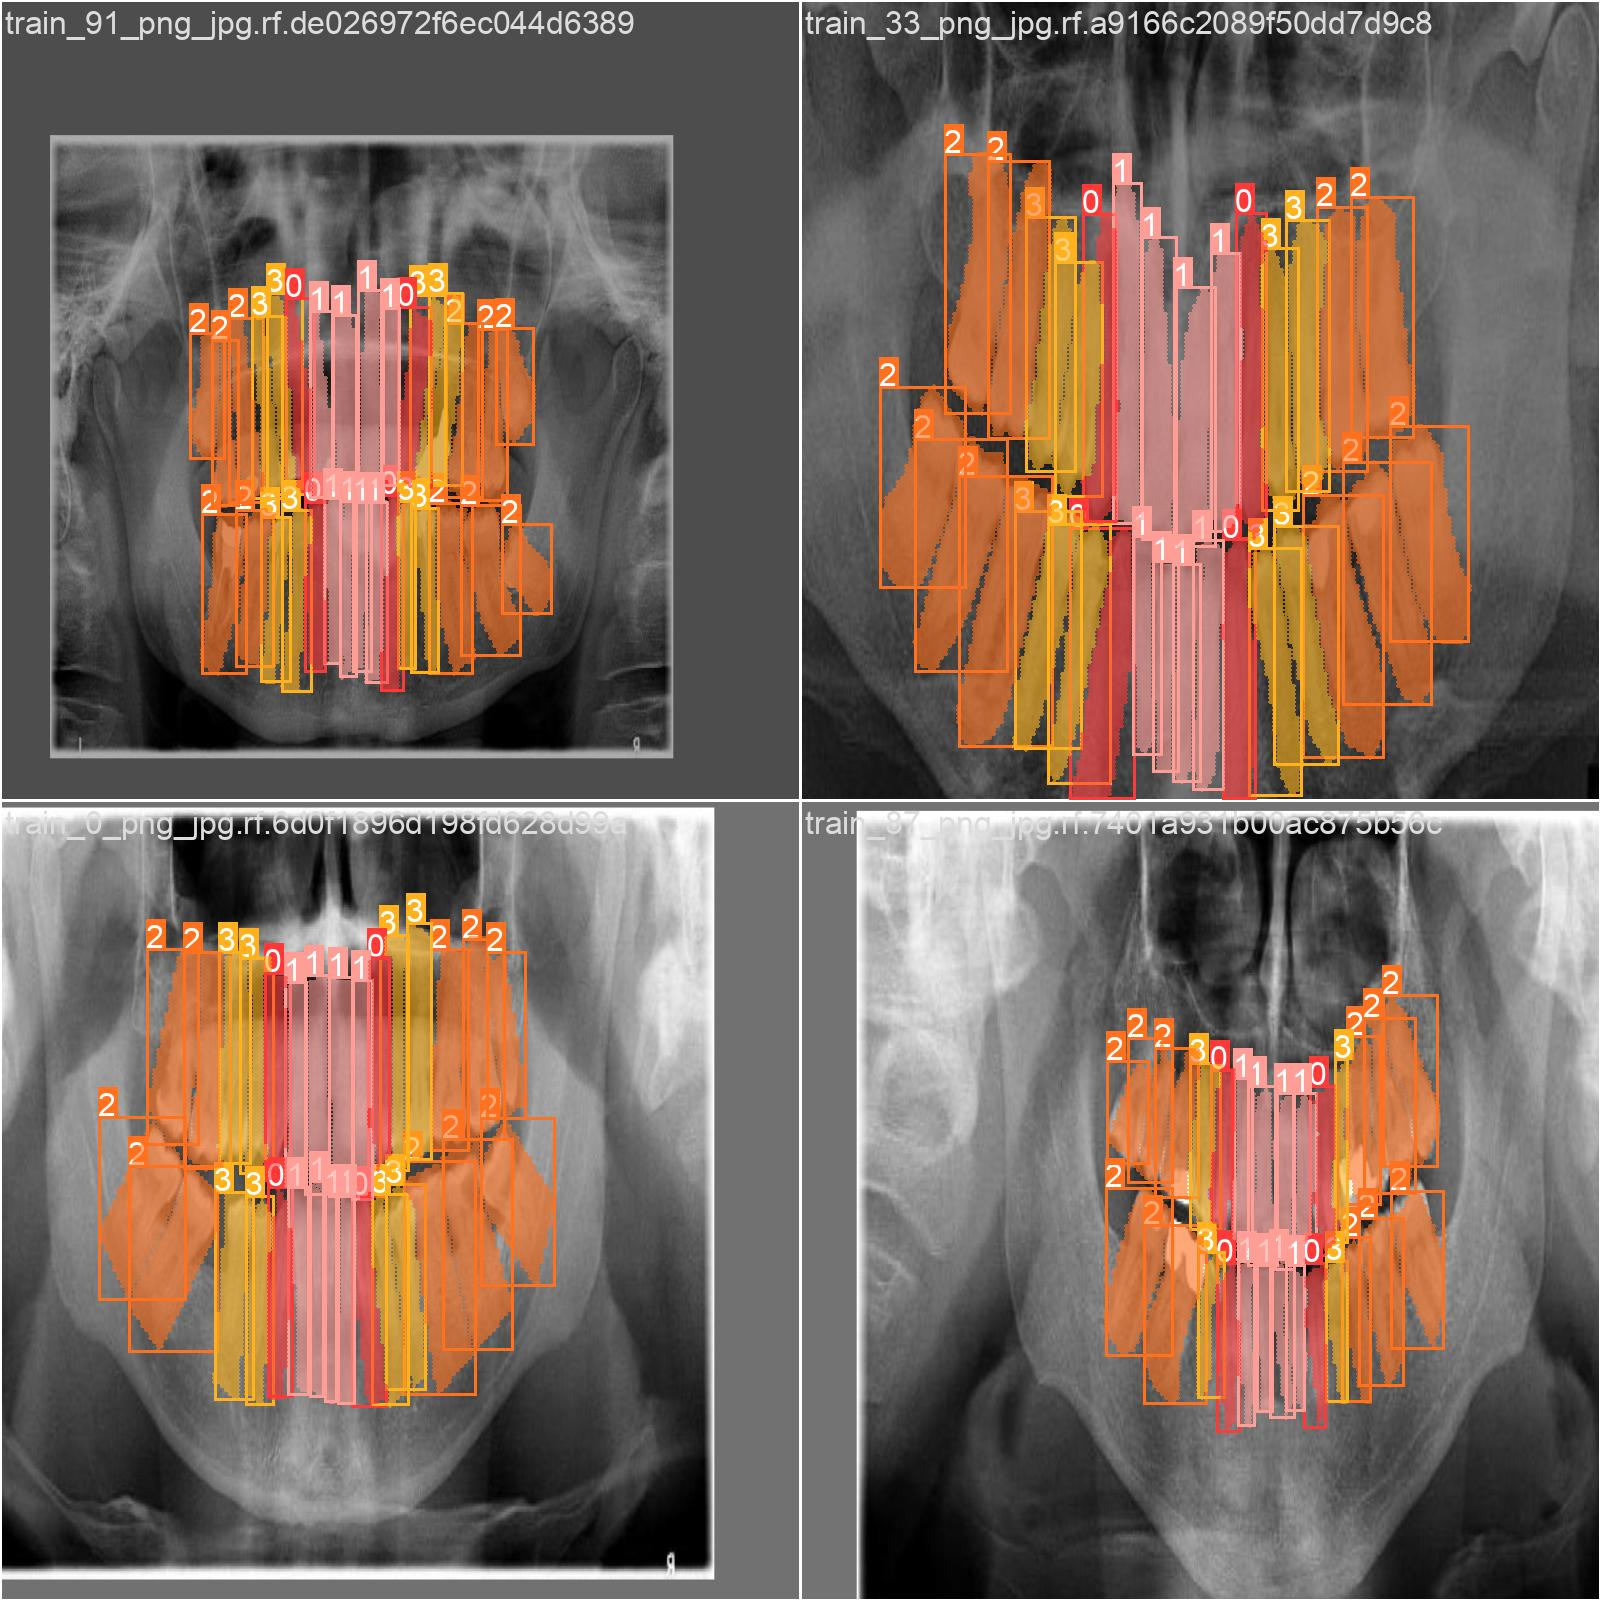

In [ ]:
Image(filename='/content/results/20_epochs-4/train_batch140.jpg', width=900)

**Run inference**

In [ ]:

%ls /content/results/20_epochs-3/weights/best.pt

/content/results/20_epochs-3/weights/best.pt


 I am picking the latest.

In [ ]:
my_new_model = YOLO('/content/results/20_epochs-3/weights/best.pt')

Loading an image and performing inference .

In [ ]:
new_image = '/content/Dental-1/test/images/train_69_png_jpg.rf.f0f2c7f782850655c32e245d663ef3d7.jpg'
new_results = my_new_model.predict(new_image, conf=0.7)  #Adjust conf threshold



image 1/1 /content/Dental-1/test/images/train_69_png_jpg.rf.f0f2c7f782850655c32e245d663ef3d7.jpg: 800x800 3 Incisorss, 6 Molars, 18.4ms
Speed: 5.0ms preprocess, 18.4ms inference, 11.8ms postprocess per image at shape (1, 3, 800, 800)


The results are stored in a variable 'new_results'.


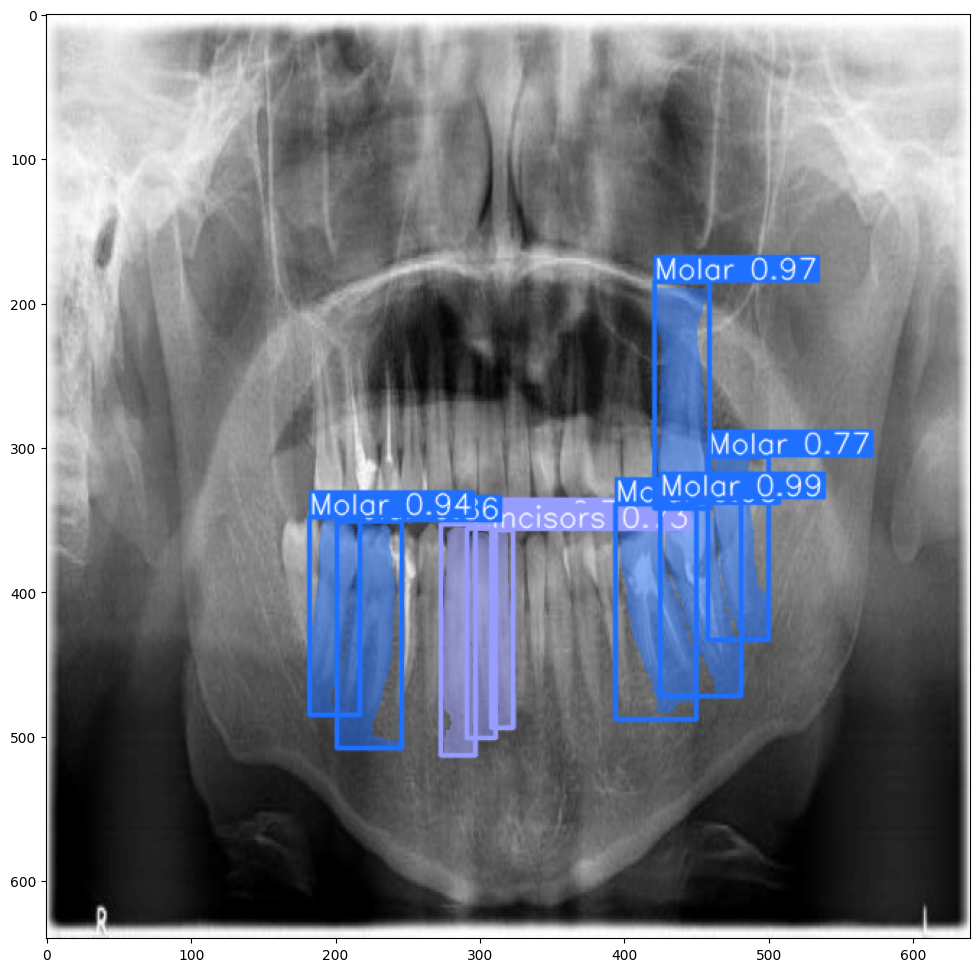

In [ ]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

**Export model to ONNX for deployment.**

In [ ]:
# Export the model
my_new_model.export(format='onnx', imgsz=[800,800])
